# MACHINE LEARNING::

**LOGISTIC REGRESSION** >> this is a Supervised classification algorithm(is used when  Y col is a category)

* "We'll be trying to predict a classification- survival or deceased" 

* Survived column can have only 2 values...either survived or deceased...hence categorical data

# Importing libraries & Collecting Data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
df= pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
## SibSp >> Sibling & Spouse no.
## Parch >> Parent & Children no.

# Analysing Data:

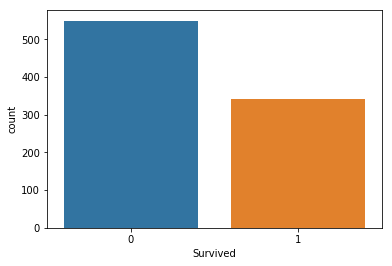

In [5]:
sns.countplot(x='Survived', data=df)

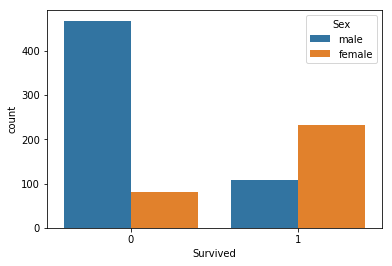

In [6]:
# Gender-wise survival case:

sns.countplot(x='Survived',hue='Sex',data=df)

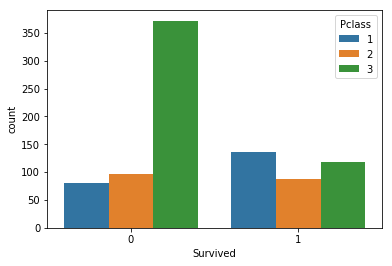

In [7]:
# PassengerClass-wise survival case:

sns.countplot(x='Survived',hue= 'Pclass',data=df)

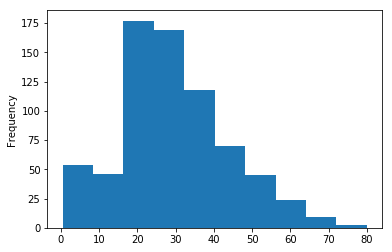

In [8]:
# To check age of passengers travelling in Titanic Ship:

df['Age'].plot.hist()

@@ We can see that we have more of young & mediocre age passengers than older ones @@

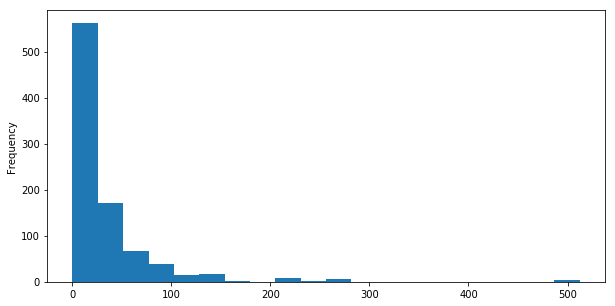

In [9]:
df['Fare'].plot.hist(bins=20, figsize=(10,5))

@@ Hence Fare is mst likely in between 0-100 @@ 

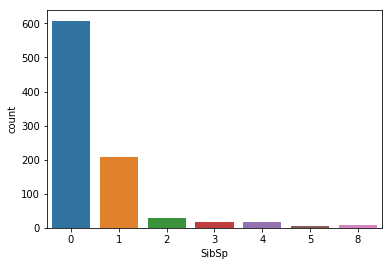

In [10]:
sns.countplot(x='SibSp', data=df)

@@ Max value at 0 i.e. neither spouse nor a sibling onboarded into titanic....2nd highest value at 1@@

C:\Users\AISHWARYA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


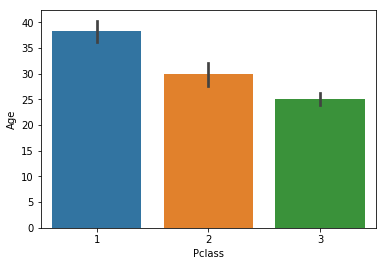

In [11]:
sns.barplot(x='Pclass', y= 'Age' , data=df)

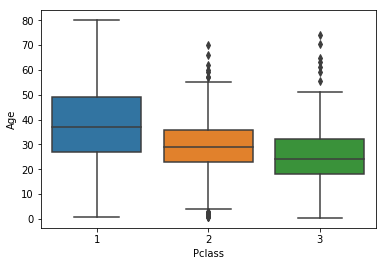

In [12]:
sns.boxplot(x='Pclass', y='Age', data= df)

# Data Wrangling : 

* Clean data by removing Nan values & unnecessary columns in the dataset.


**Handling Data Cleaning::** 3 ways >> 1) Drop whole column 2) Drop corresponding rows 3) Fill Empty values

In [13]:
# Wil return T/F if data is null (will consider NaN or None as null value):

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [14]:
# To check the sum of null values from each column:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

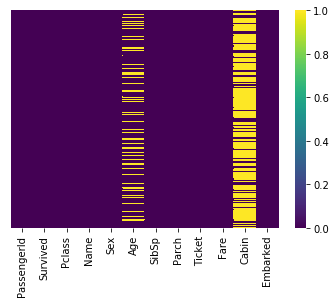

In [15]:
# For visualising null values: cmap >> color map...ticks are the values used to show specific pts. on coordinate axis
# yticklabels flase indicates no labels in y-axis

sns.heatmap(df.isnull(),yticklabels= False,cmap= 'viridis')

In [16]:
# Dropping columns which will not contribute in making a dependent column: 

df.drop('PassengerId',axis=1,inplace=True)  #u can either say column='col_name' or axis= 1
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)

#can be done as:MUTIPLE DROPPING OF COLUMNS
# df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


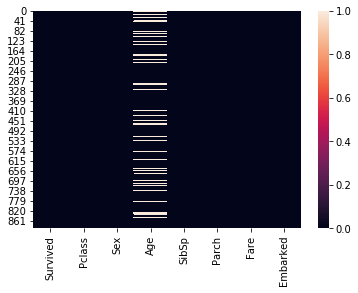

In [19]:
sns.heatmap(df.isnull())

In [20]:
# In order to fill age column : **IMPUTATION METHOD**

df.mean()['Age']

29.69911764705882

In [21]:
# Trying to fill realistic values..bcz randomly puting 29 (so calculated mean in previous cell) will not help.
# trying to guess more precisly, As passngr class 1 >> travelled by more settled ppl ; Pclass 2 >> travelled by middle aged ppl ; Pclass 3 >> travelled by less settled age student and all 

df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [22]:
# write the next code first and then this one. We are trying to fill age column null values:

def impute_age(cols):
    p= cols[0]         # 0th element of the list be Pclass
    a= cols[1]         # 1st element of the list be Age
    
    if pd.isnull(a):   # If age column is null
        if p==1:       # If PClass is 1
            return 38  # Return mean value for Pclass=1
        if p==2:
            return 30
        if p==3:
            return 25
        
    else:
        return a

In [23]:
df['Age']= df[['Pclass','Age']].apply(impute_age, axis=1)    #passing a list of age & Pclass in df & applying the function

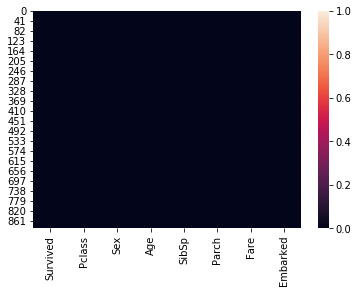

In [24]:
sns.heatmap(df.isnull())

@@ We can see that everything is black now, hence no null value @@

In [25]:
# Will drop whole rows whereever we have NaN in whole data frame 
# We use df.dropna inorder to see in whole data frame

df.dropna(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [27]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

@@ Hence no null or Nan values @@

In [28]:
df['Embarked'].unique()

#Embarked is similar to categories or castes in India.

array(['S', 'C', 'Q'], dtype=object)

In [29]:
# pd.get_dummies convert categorical data to numerical/indicator values.
# We are making new dataframes of sex & embarked (see lowercase letters s & e in new dataframes while we have uppercase letters in Columns) ) 

sex = pd.get_dummies(df['Sex'], drop_first = True)     # To hide 1st column of sex df
embarked = pd.get_dummies(df['Embarked'], drop_first = True)

In [30]:
df.drop(['Embarked', 'Sex'], axis= 1, inplace = True)

In [31]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


@@ We have removed Sex & Embarked columns from Dataframe @@

In [32]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


@@ here we knw that Sex column has 2 unique values, but indicated dummy values are made for only 1 (n-1), bcz male =1 hence by default female will have 0 value @@ 

In [33]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


@@ here we knw that Embarked column has 3 unique values, but indicated dummy values are made for only 2, hence 3rd value will b there when other 2 have 0 values under them @@

In [34]:
data = pd.concat([df, sex, embarked], axis = 1)

@@ Making new dataframe which will combine df, sex, embarked @@

In [35]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


@@ Now dataframe 'data' we so have everything in the form of numbers  hence easy to handle@@ 

In [36]:
# Correlation >> range [-1,1] >> 0 means no correlation
# -1 means related inversly, 1 means completly related 
## CORRELATION IN LINEAR REGRESSION (HERE +.5 TO -.5)

data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205,0.085564,-0.070847,0.006325
SibSp,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.118205,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,-0.541585,0.127741,0.085564,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,0.004536,0.220558,-0.070847,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,-0.151777,0.076466,0.006325,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


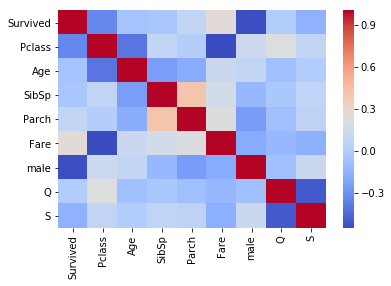

In [37]:
# showing everything into heat map bcz visuals will b good for correlation
sns.heatmap(data.corr(), cmap = 'coolwarm')

@@ Red & Blue(Xtremities)(1) >> More correlation; lighter shades(0) >> less Correlation @@

@@ diagonal red bcz related to itself completely @@


# Training & Testing the data :

* Build the model on train data & predict the output on the test data

In [38]:
# By convention X(Independent) uppercase and y(Dependent) in lowercase

X= data.drop('Survived', axis=1)   # X is a data frame (FEATURE)

In [39]:
y=data['Survived']      # y is a series (LABEL)

In [40]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [41]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Getting model trained ::**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# See Orders :: Vimp

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)  #U can add random state=1 in order to get same  result whenever u re-execute the data

In [44]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
678,3,43.00,1,6,46.9000,0,0,1
225,3,22.00,0,0,9.3500,1,0,1
662,1,47.00,0,0,25.5875,1,0,1
850,3,4.00,4,2,31.2750,1,0,1
156,3,16.00,0,0,7.7333,0,1,0
125,3,12.00,1,0,11.2417,1,0,0
705,2,39.00,0,0,26.0000,1,0,1
845,3,42.00,0,0,7.5500,1,0,1
713,3,29.00,0,0,9.4833,1,0,1
406,3,51.00,0,0,7.7500,1,0,1


In [45]:
len(y_train)

622

@@ See length of X and y train is same @@

In [46]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
739,3,25.00,0,0,7.8958,1,0,1
124,1,54.00,0,1,77.2875,1,0,1
823,3,27.00,0,1,12.4750,0,0,1
259,2,50.00,0,1,26.0000,0,0,1
611,3,25.00,0,0,7.0500,1,0,1
687,3,19.00,0,0,10.1708,1,0,1
499,3,24.00,0,0,7.7958,1,0,1
703,3,25.00,0,0,7.7417,1,1,0
347,3,25.00,1,0,16.1000,0,0,1
232,2,59.00,0,0,13.5000,1,0,1


In [47]:
len(y_test)

267

**CALCULATING PREDICTED VALUES::**

In [48]:
#Logistic regression is a class:

from sklearn.linear_model import LogisticRegression

In [49]:
#Creating object:

lr=LogisticRegression()

In [50]:
# getting model trained: 

lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
# Passing this trained model in order to test X_test...and matching this predicted y values to y test:

ypred=lr.predict(X_test)

In [52]:
ypred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [53]:
y_test

739    0
124    0
823    1
259    1
611    0
687    0
499    0
703    0
347    1
232    0
537    1
881    0
733    0
786    1
399    1
841    0
76     0
690    1
879    1
772    0
339    0
550    1
53     1
697    1
50     0
828    1
679    1
253    0
889    1
101    0
      ..
408    0
80     0
427    1
560    0
589    0
716    1
669    1
136    1
282    0
185    0
555    0
170    0
368    1
387    1
814    0
118    0
104    0
592    0
291    1
374    0
644    1
471    0
200    0
706    1
788    1
437    1
797    1
868    0
190    1
92     0
Name: Survived, Length: 267, dtype: int64

# Accuracy Check & Evaluation:

In [54]:
#confusion_matrix is a function:  (similar to mean absolute error in logistic regression )

from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_test,ypred)

#Confusion mat is summary of prediction results on a classification problem.
# It shows the ways in which ur classification model is confused when it makes predictions.

array([[143,  16],
       [ 30,  78]], dtype=int64)

@@ **RIGHT PREDICTED VALUES>>** 146+73 
**WRONG PREDICTED VALUES>>** 27+21 @@

In [56]:
from sklearn.metrics import classification_report

In [57]:
classification_report(y_test,ypred)

'             precision    recall  f1-score   support\n\n          0       0.83      0.90      0.86       159\n          1       0.83      0.72      0.77       108\n\navg / total       0.83      0.83      0.83       267\n'

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,ypred)

0.8277153558052435

@@ hence 75% accuracy is quite good @@